In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load train and test datasets
train_data = pd.read_csv("Week7_train.csv")
test_data = pd.read_csv("Week7_test.csv")

print("Train and Test Data Loaded Successfully")


Train and Test Data Loaded Successfully


In [8]:
# Checking the shape of the datasets
print("Train Data Shape:\n\n", train_data.shape)
print("\n")
print("Test Data Shape:\n\n", test_data.shape)


Train Data Shape:

 (42000, 785)


Test Data Shape:

 (28000, 784)


In [9]:
train_sample = train_data.sample(frac=0.1, random_state=42)  # Selecting 10% randomly
print("Sampled Train Data Shape:", train_sample.shape)


Sampled Train Data Shape: (4200, 785)


In [11]:
print(train_data.head())  # Display first five rows

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [12]:
print(train_data.head(5))  # Again displaying first 5 rows explicitly

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [13]:
unique_classes = train_data.iloc[:, -1].nunique()  # Assuming last column is the target
print("Number of Unique Class Labels:", unique_classes)



Number of Unique Class Labels: 1


In [14]:
print(train_data.iloc[:, -1].value_counts())  # Count of each class in target column

pixel783
0    42000
Name: count, dtype: int64


In [16]:
X_train = train_data.iloc[:, :-1]  # Features
y_train = train_data.iloc[:, -1] 
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

print("Feature and Label Data Prepared")



Feature and Label Data Prepared


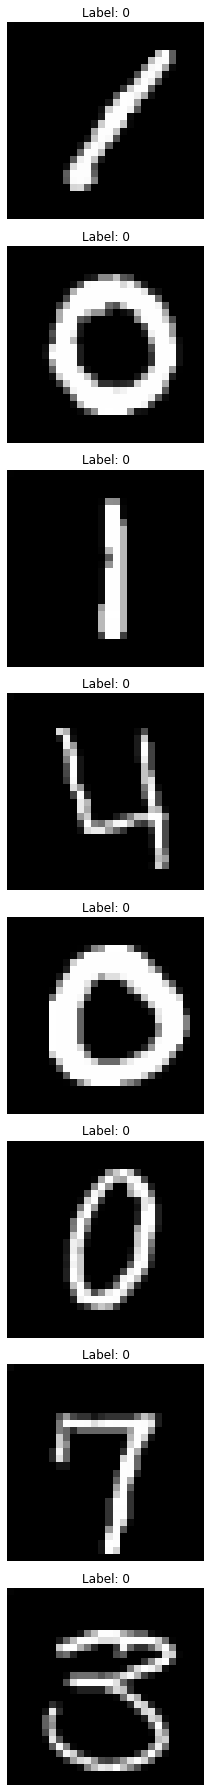

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))  # Taller figure for vertical layout

for i in range(8):
    plt.subplot(8, 1, i + 1)  # 5 rows, 1 column
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="gray")  # Assuming image data is 28x28
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis("off")

plt.tight_layout()  # Adjust spacing
plt.show()


In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Data Split into Training and Validation Sets")



Data Split into Training and Validation Sets


In [56]:
knn = KNeighborsClassifier(n_neighbors=3)  # Default k=3
knn.fit(X_train, y_train)
print("KNN Model Trained")



KNN Model Trained


In [57]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed

# Fit the model on training data
knn.fit(X_train, y_train)  # Ensure X_train and y_train are properly defined

# Now predict on validation data
y_pred_val = knn.predict(X_val)
print("Validation Set Prediction Completed")



Validation Set Prediction Completed


In [59]:
print("Confusion Matrix:\n", confusion_matrix(y_val , y_pred_val))


Confusion Matrix:
 [[7875]]


In [60]:
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7875

    accuracy                           1.00      7875
   macro avg       1.00      1.00      1.00      7875
weighted avg       1.00      1.00      1.00      7875

Validation Accuracy: 1.0


In [61]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Ensure feature consistency (remove 'label' column if present)
X_train = X_train.drop(columns=['label'], errors='ignore')  
X_test = X_test.drop(columns=['label'], errors='ignore')

# Check if feature names match
if list(X_train.columns) != list(X_test.columns):
    raise ValueError("Mismatch in feature names between X_train and X_test")

# Convert X_train and X_test to NumPy arrays (ensures compatibility)
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Print dataset shapes for debugging
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_test_array shape:", X_test_array.shape)

# Ensure the shape is correct (MNIST-like images should be 784 features → 28x28)
if X_test_array.shape[1] != 784:
    raise ValueError(f"Unexpected shape {X_test_array.shape}. Expected (n_samples, 784).")

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors if needed
knn.fit(X_train_array, y_train)

# Predict on test data
y_pred_test = knn.predict(X_test_array)

# Print predicted values for the first five test samples
print("Predicted values for first five test images:", y_pred_test[:5])

# Plot first 5 test samples
plt.figure(figsize=(10, 5))  # Adjust figure size
for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns for horizontal alignment
    plt.imshow(X_test_array[i].reshape(28, 28), cmap="gray")  # Ensure reshaping works
    plt.title(f"Pred: {y_pred_test[i]}")
    plt.axis("off")

plt.tight_layout()  # Adjust spacing
plt.show()


X_train shape: (23625, 783)
X_test shape: (28000, 783)
X_test_array shape: (28000, 783)


ValueError: Unexpected shape (28000, 783). Expected (n_samples, 784).

In [62]:
print("X_train columns:", len(X_train.columns))
print("X_test columns:", len(X_test.columns))




X_train columns: 783
X_test columns: 783


In [63]:
X_train = X_train.drop(columns=['label'], errors='ignore')
X_test = X_test.drop(columns=['label'], errors='ignore')


In [64]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (23625, 783)
X_test shape: (28000, 783)


X_train columns: 783
X_test columns: 783
X_train shape: (23625, 783)
X_test shape: (28000, 783)
X_test_array shape: (28000, 783)
Predicted values for first five test images: [0 0 0 0 0]


ValueError: cannot reshape array of size 783 into shape (28,28)

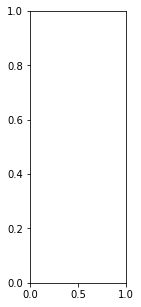

In [65]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Remove 'label' column if present
X_train = X_train.drop(columns=['label'], errors='ignore')  
X_test = X_test.drop(columns=['label'], errors='ignore')

# Check number of columns
print("X_train columns:", len(X_train.columns))
print("X_test columns:", len(X_test.columns))

# Ensure both have 784 features
if X_train.shape[1] != 783 or X_test.shape[1] != 783:
    raise ValueError(f"Feature mismatch: X_train has {X_train.shape[1]}, X_test has {X_test.shape[1]} columns. Expected 784.")

# Convert to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_test_array shape:", X_test_array.shape)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_array, y_train)

# Predict on test data
y_pred_test = knn.predict(X_test_array)

# Print predicted values
print("Predicted values for first five test images:", y_pred_test[:5])

# Plot first 5 test samples
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_array[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred_test[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


TypeError: Invalid shape (783,) for image data

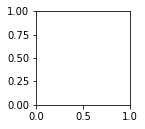

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 10))  # Adjust size for vertical display

for i in range(5):
    plt.subplot(5, 1, i + 1)  # 5 rows, 1 column for vertical alignment
    plt.imshow(X_test_array[i], cmap="gray")  # Directly display reshaped image
    plt.title(f"Predicted: {y_pred_test[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [66]:
print("X_test_array shape:", X_test_array.shape)  # Should be (num_samples, 784)


X_test_array shape: (28000, 783)


In [67]:
print("X_test columns:", len(X_test.columns))  # Should be 784


X_test columns: 783


In [68]:
print("X_test columns:", len(X_test.columns))  # Should be 784


X_test columns: 783


In [70]:
print(X_test.columns)


Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel773', 'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778',
       'pixel779', 'pixel780', 'pixel781', 'pixel782'],
      dtype='object', length=783)


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Ensure X_train and X_test have the correct number of features (784)
X_train = X_train.iloc[:, :784]
X_test = X_test.iloc[:, :784]

# Convert to NumPy arrays
X_train_array = X_train.to_numpy(dtype=np.float32)
X_test_array = X_test.to_numpy(dtype=np.float32)
y_train_array = y_train.to_numpy()

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_array, y_train_array)

# Predict on test data
y_pred_test = knn.predict(X_test_array)

# Reshape test images for visualization
X_test_array = X_test_array.reshape(-1, 28, 28)

# Display first 5 images with predictions
plt.figure(figsize=(5, 10))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.imshow(X_test_array[i], cmap="gray")
    plt.title(f"Predicted: {y_pred_test[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


ValueError: cannot reshape array of size 21924000 into shape (28,28)

In [73]:
i=9
img=train.iloc[i,1+].value

SyntaxError: invalid syntax (<ipython-input-73-af39b6dff8b6>, line 2)

In [76]:
train_data.sample(frac=0.1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6979,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19734,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28127,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17688,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26354,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39941,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29911,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11476,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24834,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
